In [3]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_price.pkl'.format(os.environ['HOME'])
df_DUID_CO2_price = pd.read_pickle(file_path)
df_DUID_CO2_price.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
PeriodID,,,
2018-07-31 23:55:00,70.70204,0.910143,0.89508
2018-07-31 23:50:00,69.24109,0.728114,0.59672
2018-07-31 23:45:00,69.94850,0.910143,0.89508
2018-07-31 23:40:00,74.04497,0.908305,0.89508
2018-07-31 23:35:00,76.44245,0.971761,0.89508


<Figure size 432x288 with 0 Axes>

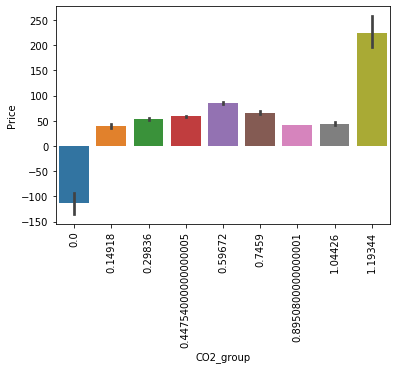

<Figure size 432x288 with 0 Axes>

In [6]:
fig = sns.barplot(df_DUID_CO2_price.CO2_group, df_DUID_CO2_price.Price)
for i in fig.get_xticklabels():
    i.set_rotation(90)
plt.figure()

<Figure size 432x288 with 0 Axes>

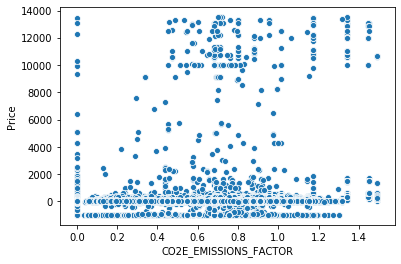

<Figure size 432x288 with 0 Axes>

In [7]:
fig = sns.scatterplot(df_DUID_CO2_price.CO2E_EMISSIONS_FACTOR, df_DUID_CO2_price.Price)
plt.figure()

In [8]:
group_year = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.year).mean()
group_quarter = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.quarter).mean()
group_month = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.month).mean()
group_week = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.week).mean()
group_day = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.day).mean()
group_hour = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.hour).mean()
group_minute = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.minute).mean()

#quarter: Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.

In [9]:
time_periods = {"year":group_year,"quarter":group_quarter, "month":group_month, "week":group_week,\
                "day":group_day, "hour":group_hour, "minute":group_minute}

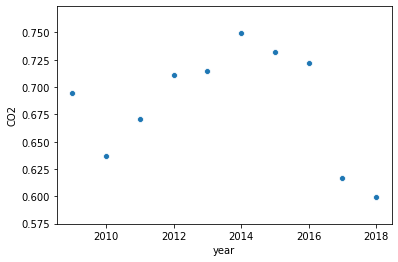

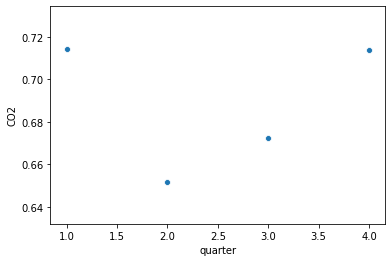

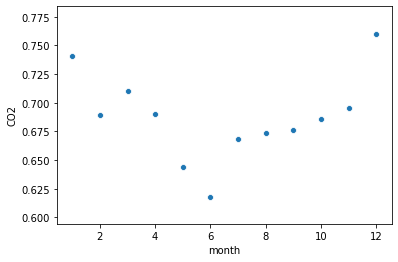

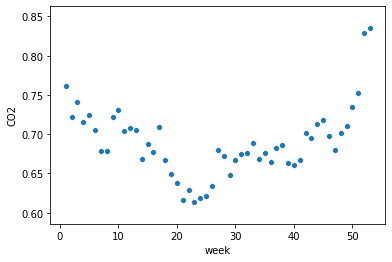

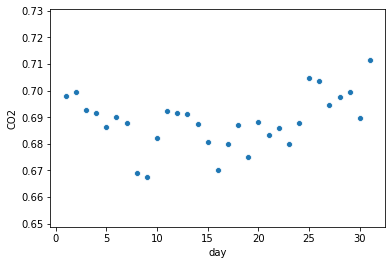

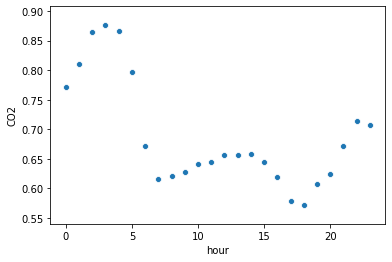

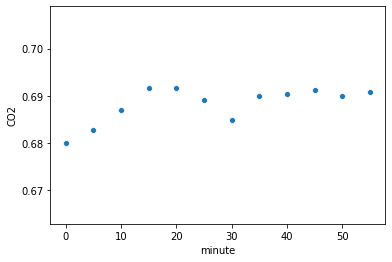

<Figure size 432x288 with 0 Axes>

In [10]:
for i in time_periods:
    fig = sns.scatterplot(time_periods[i].index, time_periods[i].CO2E_EMISSIONS_FACTOR)
    fig.set(xlabel = i, ylabel = "CO2")
    plt.figure()

In [11]:
group_year_month = df_DUID_CO2_price.groupby([df_DUID_CO2_price.index.year, df_DUID_CO2_price.index.month]).mean()
group_year_month

Price  CO2E_EMISSIONS_FACTOR
PeriodID PeriodID                                   
2009     7          27.480607               0.712181
         8          22.782450               0.746957
         9          23.929861               0.714859
         10         28.071345               0.643430
         11        203.403979               0.638252
...                       ...                    ...
2018     3          80.679767               0.642916
         4          85.153025               0.608576
         5          86.869343               0.549339
         6          67.987404               0.767256
         7          92.727312               0.597887

[109 rows x 2 columns]

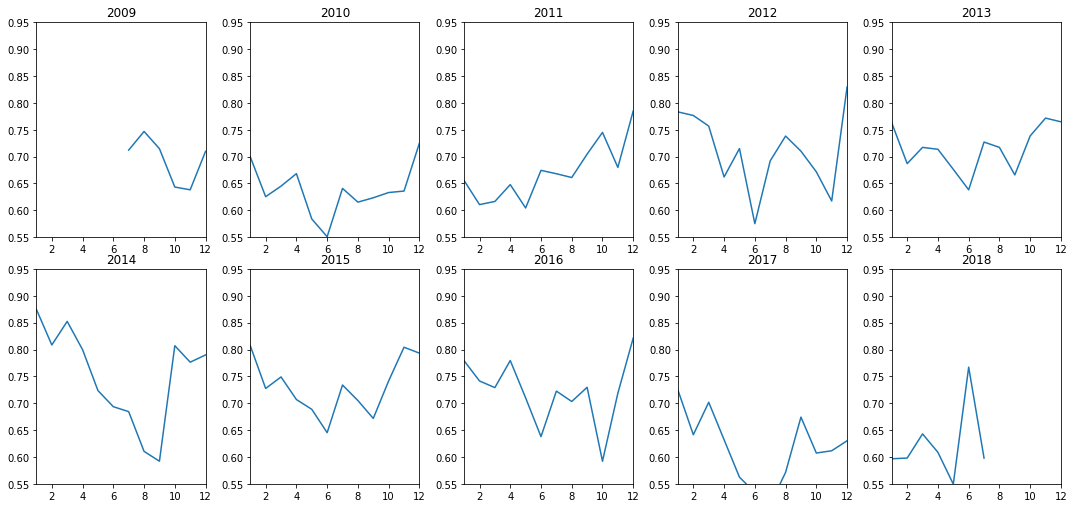

In [12]:
df_unstacked = group_year_month.unstack(level=0).CO2E_EMISSIONS_FACTOR

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,7))
plt.tight_layout()

count_k = 0
for i in range(axes.shape[0]):
    for j in axes[i]:
        j.set_xlim(1,12)
        j.set_ylim(0.55,0.95)
        j.set_xticks(list(range(2,13,2)))
        j.set_title(df_unstacked.columns[count_k])
        j.plot(df_unstacked.index, df_unstacked.iloc[:, count_k])
        count_k += 1

In [15]:
df_unstacked = group_year_month.unstack(level=0).CO2E_EMISSIONS_FACTOR

In [18]:
df_unstacked

PeriodID,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
PeriodID,,,,,,,,,,
1,NaN,0.699457,0.655480,0.783358,0.762508,0.874584,0.807080,0.779090,0.724257,0.596632
2,NaN,0.625458,0.610721,0.776635,0.687033,0.808551,0.727536,0.741494,0.641374,0.597925
3,NaN,0.645102,0.616553,0.756958,0.717267,0.852429,0.748992,0.729118,0.701825,0.642916
4,NaN,0.668365,0.647906,0.662153,0.713688,0.799783,0.706933,0.779545,0.632058,0.608576
5,NaN,0.583924,0.604423,0.715107,0.676363,0.723618,0.688686,0.709998,0.562308,0.549339
6,NaN,0.550888,0.674476,0.575157,0.638230,0.693586,0.645222,0.637817,0.533984,0.767256
7,0.712181,0.640871,0.668183,0.692139,0.727168,0.684359,0.733954,0.722642,0.511428,0.597887
8,0.746957,0.615287,0.661123,0.738354,0.717231,0.610381,0.705031,0.703295,0.571258,NaN
9,0.714859,0.623407,0.704685,0.710217,0.665992,0.592049,0.671736,0.729655,0.674198,NaN


In [23]:
df_unstacked.columns

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='PeriodID')

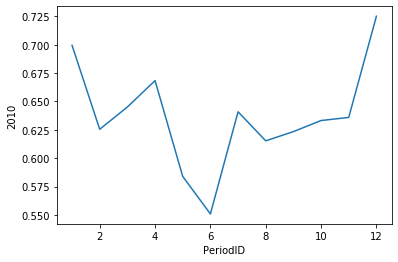

In [28]:
fig = sns.lineplot(df_unstacked.index, df_unstacked[2010])

In [34]:
df_resample = df_DUID_CO2_price.resample("M").mean()
df_resample.head()

,Price,CO2E_EMISSIONS_FACTOR
PeriodID,,
2009-07-31,27.480607,0.712181
2009-08-31,22.782450,0.746957
2009-09-30,23.929861,0.714859
2009-10-31,28.071345,0.643430
2009-11-30,203.403979,0.638252


In [35]:
df_resample.index

DatetimeIndex(['2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31',
               '2009-11-30', '2009-12-31', '2010-01-31', '2010-02-28',
               '2010-03-31', '2010-04-30',
               ...
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31'],
              dtype='datetime64[ns]', name='PeriodID', length=109, freq='M')

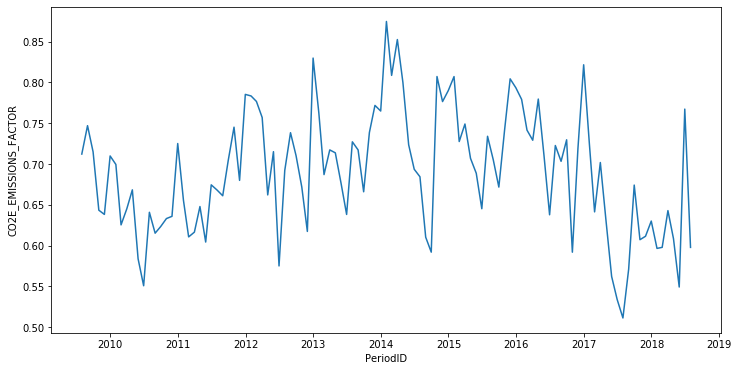

In [51]:
plt.figure(figsize=(12,6))
sns.lineplot(df_resample.index, df_resample.CO2E_EMISSIONS_FACTOR)

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

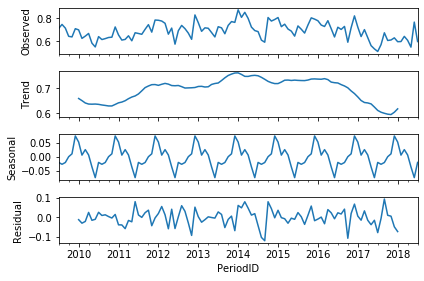

In [62]:
result = seasonal_decompose(df_resample.CO2E_EMISSIONS_FACTOR, model='additive')
result.plot();

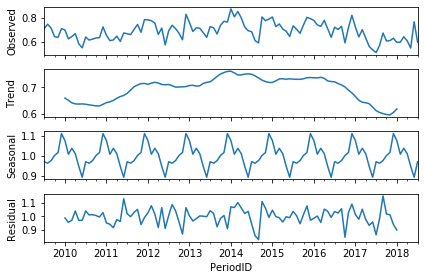

In [63]:
result = seasonal_decompose(df_resample.CO2E_EMISSIONS_FACTOR, model='multiplicative')
result.plot();